<a href="https://colab.research.google.com/github/marioalejandrohernandez/Regresion-No-Lineal/blob/main/Actividad6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresion Lineal Multiple**

In [129]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("cuentas_credicel.csv", encoding='ISO-8859-1')

df

<ipython-input-129-618b7efd9f55>:5: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cuentas_credicel.csv", encoding='ISO-8859-1')


folio       tag  folio_solicitud           fecha     marca  \
0          3  HDNAWQ3A               30  12/11/21 19:00       ZTE   
1          4  M418YNR4               33  12/11/21 19:15  MOTOROLA   
2          5  SZ7V3NZT               37  13/11/21 14:13       ZTE   
3          6  9I08UIQZ               38  13/11/21 15:45       ZTE   
4          7  JMF4LKYU               44  13/11/21 16:10  MOTOROLA   
...      ...       ...              ...             ...       ...   
22730  22967  92KQVRIX            96502  18/04/23 18:45  Motorola   
22731  22968  NWB2EA8J            96479  18/04/23 18:46  Motorola   
22732  22969  VDTRJ2W6            96442  18/04/23 18:47   Samsung   
22733  22970  PETLF56C            96536  18/04/23 18:49   Samsung   
22734  22971  2CI4N2WS            96534  18/04/23 18:49   Samsung   

                             modelo plazo  precio  enganche  descuento  ...  \
0                Blade A3 2020 RO B   26S  1949.0     780.0        0.0  ...   
1      LTE XT2097-12 E7I POWER Azul   13S  2999.0    1050.0        0.0  ...   
2                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0  ...   
3                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0  ...   
4                             G10 B   39S  4299.0    1075.0        0.0  ...   
...                             ...   ...     ...       ...        ...  ...   
22730                      Moto E13   26S  3349.0     297.0        0.0  ...   
22731                     Moto E22i   26S  4100.0    1209.0        0.0  ...   
22732                           A13   26S  4849.0    1152.0        0.0  ...   
22733                        A53 5G   39S  9799.0    2799.0        0.0  ...   
22734                        A22 5G   26S  5399.0    1086.0        0.0  ...   

       porc_eng  limite_credito  semana_actual  cp_cliente edad_cliente  \
0         40.02            5000             26         NaN         23.0   
1         35.01            6000             13         NaN         60.0   
2         25.01               0             74         NaN         58.0   
3         25.01            7000             13         NaN         42.0   
4         25.01            7000             74         NaN         33.0   
...         ...             ...            ...         ...          ...   
22730      8.87           10000              0       97880         22.0   
22731     29.49            5000              0       37295         27.0   
22732     23.76            4750              0       20210         36.0   
22733     28.56            7000              0       78434         53.0   
22734     20.11            4750              0       43800         19.0   

                        cd_cliente  edo_cliente                     cd_venta  \
0                                0            0                    Tantoyuca   
1                          PUEBLA          PUE.   Heroica Puebla de Zaragoza   
2                        TANTOYUCA         VER.                            0   
3                      AMXTLAN PUE          NaN                     Zacatlan   
4                       TANTOYUCA          VER.                    Tantoyuca   
...                            ...          ...                          ...   
22730                    OXKUTZCAB          YUC                    Oxkutzcab   
22731                         LEON          GTO                         Leon   
22732               AGUASCALIENTES          AGS               Aguascalientes   
22733  SOLEDAD DE GRACIANO SANCHEZ          SLP  Soledad De Graciano Sanchez   
22734                     TIZAYUCA          HGO            San Jose Del Cabo   

                 edo_venta                curp  
0                 Veracruz  AEVM980413MVZNDR02  
1                   Puebla  ZALC610119MPLPRR07  
2                        0                   0  
3                   Puebla  SAMJ790115MPLNRS02  
4                 Veracruz  TEHF880707HVZRRR07  
...                    ...                 ...  
22730              Yucat

**Nulos**

In [130]:
for columna in df.columns:
    if df[columna].dtype == 'object':
        # Si la columna es categórica, imputamos con la moda
        moda = df[columna].mode()[0]
        df[columna].fillna(moda, inplace=True)
    else:
        # Si la columna es numérica, imputamos con la mediana
        mediana = df[columna].median()
        df[columna].fillna(mediana, inplace=True)
df.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [131]:
columnns = list(df.columns)

# Ciclo for para encontrar outliers
for columna in df.columns:
    if df[columna].dtypes == 'int64' or df[columna].dtypes == 'float64':
        # Calcular cuartiles para identificar outliers en cada columna
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)

        # Calcular el IQR
        IQR = Q3 - Q1

        # Definir los límites para outliers
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        # Máscara booleana para identificar outliers
        outlier_mask = (df[columna] < lim_inf) | (df[columna] > lim_sup)

        # Reemplazar outliers por la mediana
        median = df[columna].median()
        df.loc[outlier_mask, columna] = median




**Regresion Multiple**

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score

In [133]:
df = df.dropna(axis=1)
#No me corrio la matriz de dispersiones pero

 y = ax^2 + bx + c   ("Función cuadrática")

        y = a*exp(bx) + c   ("Función exponencial")

        y = 1/a*x           ("Función inversa")

        y = a*np.sin(x) + b ("Función senoidal")

        y = a*np.tan(x) + b ("Función tangencial")

        y = a*np.abs(x) + b*x + c (Función Valor absoluto)

        y = (a*x**2 + b)/ c*x (Función cociente entre polinomios)

        y = a*np.log(x) + b  (Función logaritmica)

        y = a*x + b*x + c*x (Función lineal con producto de coeficientes)

        y = 1/a*x**2  (Función cuadrática inversa)

        y = a/b*x**2 + c*x (Función polinomial inversa)

#**------------------Modelo No Lineal Riesgo---------------**

In [134]:
Vars_Indep= df[['precio']]
Var_Dep= df['riesgo']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return (a*x**10 + b)/ c*x

parametros, covs= curve_fit(func1, df['precio'], df['riesgo'])



parametros, _ = curve_fit(func1, df['precio'], df['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit1 = (a*x**10 + b)/ c*x

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


**predicciones**

In [135]:
yfit1

precio
0     -8.375224e+17
1     -9.589751e+19
2     -8.860230e+17
3     -8.860230e+17
4     -5.036260e+21
...             ...
22730 -3.229482e+20
22731 -2.990120e+21
22732 -1.893391e+22
22733 -6.112688e+20
22734 -6.173235e+22

[22735 rows x 1 columns]

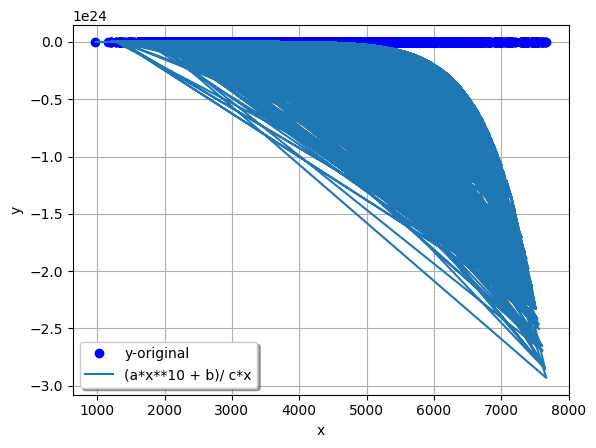

In [136]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="(a*x**10 + b)/ c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()


In [137]:
R2_1 = r2_score(y, yfit1)
R2_1

-2.2173614560184877e+44

In [138]:
corr= np.sqrt(abs(R2_1))
corr

1.4890807419406402e+22

#**----------------Modelo No lineal Score Buro---------------------**

In [167]:
Vars_Indep= df[['riesgo']]
Var_Dep= df['score_buro']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a, b, c):
     return a/b*x**2 + c*x

parametros, covs = curve_fit(func1, df['score_buro'], df['riesgo'])



parametros, _ = curve_fit(func1, df['score_buro'], df['riesgo'])
a, b, c = parametros[ 0 ], parametros[ 1 ], parametros[ 2 ]
yfit2 = a/b*x**2 + c*x
yfit2

riesgo
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
...         ...
22730  5.607420
22731  3.945162
22732  5.461046
22733 -3.827025
22734  4.504829

[22735 rows x 1 columns]

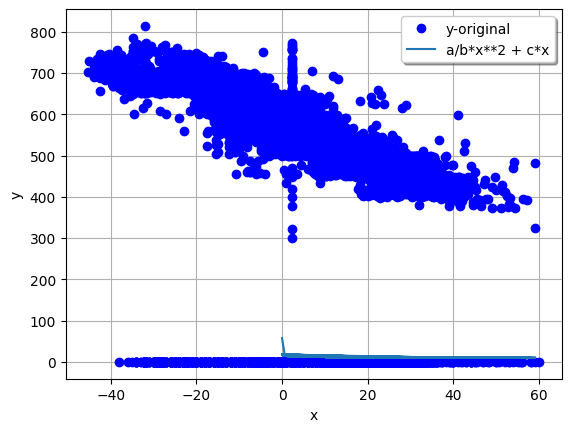

In [168]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="a/b*x**2 + c*x")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [169]:
R2_2 = r2_score(y, yfit2)
R2_2

-1.0367187491116248

In [170]:
corr2= np.sqrt(abs(R2_2))
corr2

1.0181938661726582

#**----------------------------Modelo 3 porc_eng----------------------------**

In [176]:
Vars_Indep= df[['precio']]
Var_Dep= df['porc_eng']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

parametros, covs = curve_fit(func1, df['porc_eng'], df['precio'])



parametros, _ = curve_fit(func1, df['porc_eng'], df['precio'])
a = parametros[ 0 ]
yfit2 = 1/a*x
yfit2

precio
0      324306.413248
1      499022.541473
2      325970.376374
3      325970.376374
4      715337.747846
...              ...
22730  557261.250881
22731  682224.881640
22732  806855.719773
22733  590540.513400
22734  898373.691701

[22735 rows x 1 columns]

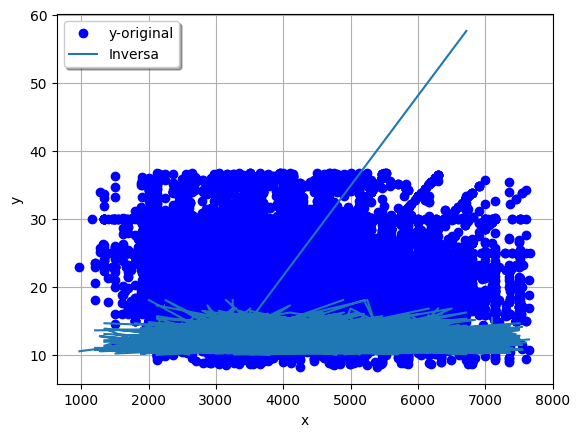

In [177]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="Inversa")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [178]:
R2_3 = r2_score(y, yfit2)
R2_3

-17114515210.332455

In [179]:
corr3= np.sqrt(abs(R2_3))
corr3

130822.45682730644

In [183]:
df

folio       tag  folio_solicitud           fecha     marca  \
0          3  HDNAWQ3A               30  12/11/21 19:00       ZTE   
1          4  M418YNR4               33  12/11/21 19:15  MOTOROLA   
2          5  SZ7V3NZT               37  13/11/21 14:13       ZTE   
3          6  9I08UIQZ               38  13/11/21 15:45       ZTE   
4          7  JMF4LKYU               44  13/11/21 16:10  MOTOROLA   
...      ...       ...              ...             ...       ...   
22730  22967  92KQVRIX            96502  18/04/23 18:45  Motorola   
22731  22968  NWB2EA8J            96479  18/04/23 18:46  Motorola   
22732  22969  VDTRJ2W6            96442  18/04/23 18:47   Samsung   
22733  22970  PETLF56C            96536  18/04/23 18:49   Samsung   
22734  22971  2CI4N2WS            96534  18/04/23 18:49   Samsung   

                             modelo plazo  precio  enganche  descuento  ...  \
0                Blade A3 2020 RO B   26S  1949.0     780.0        0.0  ...   
1      LTE XT2097-12 E7I POWER Azul   13S  2999.0    1050.0        0.0  ...   
2                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0  ...   
3                BLADE A3 2020 Gris   13S  1959.0     490.0        0.0  ...   
4                             G10 B   39S  4299.0    1075.0        0.0  ...   
...                             ...   ...     ...       ...        ...  ...   
22730                      Moto E13   26S  3349.0     297.0        0.0  ...   
22731                     Moto E22i   26S  4100.0    1209.0        0.0  ...   
22732                           A13   26S  4849.0    1152.0        0.0  ...   
22733                        A53 5G   39S  3549.0     826.0        0.0  ...   
22734                        A22 5G   26S  5399.0    1086.0        0.0  ...   

       porc_eng  limite_credito  semana_actual  cp_cliente edad_cliente  \
0         22.91            5000             26           0         23.0   
1         35.01            6000             13           0         60.0   
2         25.01               0             16           0         58.0   
3         25.01            7000             13           0         42.0   
4         25.01            7000             16           0         33.0   
...         ...             ...            ...         ...          ...   
22730      8.87           10000              0       97880         22.0   
22731     29.49            5000              0       37295         27.0   
22732     23.76            4750              0       20210         36.0   
22733     28.56            7000              0       78434         53.0   
22734     20.11            4750              0       43800         19.0   

                        cd_cliente  edo_cliente                     cd_venta  \
0                                0            0                    Tantoyuca   
1                          PUEBLA          PUE.   Heroica Puebla de Zaragoza   
2                        TANTOYUCA         VER.                            0   
3                      AMXTLAN PUE          PUE                     Zacatlan   
4                       TANTOYUCA          VER.                    Tantoyuca   
...                            ...          ...                          ...   
22730                    OXKUTZCAB          YUC                    Oxkutzcab   
22731                         LEON          GTO                         Leon   
22732               AGUASCALIENTES          AGS               Aguascalientes   
22733  SOLEDAD DE GRACIANO SANCHEZ          SLP  Soledad De Graciano Sanchez   
22734                     TIZAYUCA          HGO            San Jose Del Cabo   

                 edo_venta                curp  
0                 Veracruz  AEVM980413MVZNDR02  
1                   Puebla  ZALC610119MPLPRR07  
2                        0                   0  
3                   Puebla  SAMJ790115MPLNRS02  
4                 Veracruz  TEHF880707HVZRRR07  
...                    ...                 ...  
22730              Yucat

In [195]:

limite_credito_columna = df['limite_credito']
limite_credito_columna

0         5000
1         6000
2            0
3         7000
4         7000
5         7000
6         6000
7         7000
8         7000
9         7000
10        6000
11        7000
12        7000
13        7000
14        7000
15        7000
16        7000
17        7000
18        7000
19        7000
20        7000
21        7000
22        7000
23        7000
24        7000
25        6000
26        6000
27        6000
28        6000
29        7000
30        6000
31        7000
32        6000
33        6000
34        6000
35        7000
36        7000
37        6000
38        7000
39        6000
40        7000
41        6000
42        6000
43        6000
44        7000
45        6000
46        6000
47           0
48        6000
49        6000
50        6000
51        7000
52        7000
53        7000
54        7000
55        6000
56        7000
57        7000
58        7000
59        6000
60        7000
61        7000
62        7000
63        7000
64        6000
65        6000
66        

#**------------------------------Modelo limite_crédito----------------**

In [203]:
df_filtrado = df[df['limite_credito'] == 'SD']
df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')
promedio_limite_credito = df['limite_credito'].mean()
df['limite_credito'].fillna(promedio_limite_credito, inplace=True)

Vars_Indep= df[['edad_cliente']]
Var_Dep= df['limite_credito']
x= Vars_Indep
y= Var_Dep

def  func1 (x, a):
     return 1/a*x

parametros, covs = curve_fit(func1, df['limite_credito'], df['edad_cliente'])



parametros, _ = curve_fit(func1, df['limite_credito'], df['edad_cliente'])
a = parametros[ 0 ]
yfit3 = 1/a*x
yfit3

edad_cliente
0          0.122193
1          0.318764
2          0.308139
3          0.223135
4          0.175320
5          0.201884
6          0.111567
7          0.239073
8          0.191259
9          0.249699
10         0.106255
11         0.228448
12         0.244386
13         0.196571
14         0.223135
15         0.212510
16         0.292201
17         0.164695
18         0.196571
19         0.297513
20         0.244386
21         0.228448
22         0.276262
23         0.255011
24         0.223135
25         0.143444
26         0.095629
27         0.122193
28         0.132818
29         0.164695
30         0.111567
31         0.233760
32         0.116880
33         0.095629
34         0.148757
35         0.207197
36         0.154069
37         0.111567
38         0.191259
39         0.132818
40         0.212510
41         0.138131
42         0.132818
43         0.100942
44         0.196571
45         0.138131
46         0.180633
47         0.106255
48         0.106255
49         0.132818
50         0.132818
51         0.239073
52         0.154069
53         0.201884
54         0.191259
55         0.127506
56         0.212510
57         0.175320
58         0.212510
59         0.148757
60         0.286888
61         0.212510
62         0.207197
63         0.191259
64         0.111567
65         0.122193
66         0.138131
67         0.212510
68         0.170008
69         0.100942
70         0.196571
71         0.132818
72         0.191259
73         0.164695
74         0.111567
75         0.143444
76         0.159382
77         0.180633
78         0.148757
79         0.297513
80         0.143444
81         0.159382
82         0.185946
83         0.170008
84         0.207197
85         0.260324
86         0.164695
87         0.212510
88         0.260324
89         0.159382
90         0.170008
91         0.143444
92         0.318764
93         0.127506
94         0.223135
95         0.175320
96         0.170008
97         0.233760
98         0.255011
99         0.106255
100        0.122193
101        0.116880
102        0.127506
103        0.154069
104        0.164695
105        0.116880
106        0.164695
107        0.138131
108        0.255011
109        0.138131
110        0.217822
111        0.175320
112        0.143444
113        0.217822
114        0.159382
115        0.217822
116        0.196571
117        0.095629
118        0.228448
119        0.159382
120        0.286888
121        0.249699
122        0.201884
123        0.154069
124        0.132818
125        0.159382
126        0.249699
127        0.244386
128        0.159382
129        0.281575
130        0.116880
131        0.143444
132        0.185946
133        0.255011
134        0.260324
135        0.154069
136        0.201884
137        0.201884
138        0.148757
139        0.201884
140        0.095629
141        0.185946
142        0.170008
143        0.138131
144        0.350641
145        0.185946
146        0.185946
147        0.116880
148        0.138131
149        0.116880
150        0.260324
151        0.270950
152        0.164695
153        0.207197
154        0.116880
155        0.244386
156        0.095629
157        0.212510
158        0.106255
159        0.185946
160        0.239073
161        0.127506
162        0.170008
163        0.175320
164        0.233760
165        0.196571
166        0.127506
167        0.196571
168        0.111567
169        0.255011
170        0.212510
171        0.100942
172        0.207197
173        0.207197
174        0.164695
175        0.170008
176        0.127506
177        0.302826
178        0.223135
179        0.196571
180        0.260324
181        0.180633
182        0.100942
183        0.185946
184        0.154069
185        0.159382
186        0.249699
187        0.223135
188        0.196571
189        0.175320
190        0.154069
191        0.154069
192        0.143444
193        0.159382
194        0.116880
195        0.111567
196        0.116880
197        0.148757
198        0.132818
199    

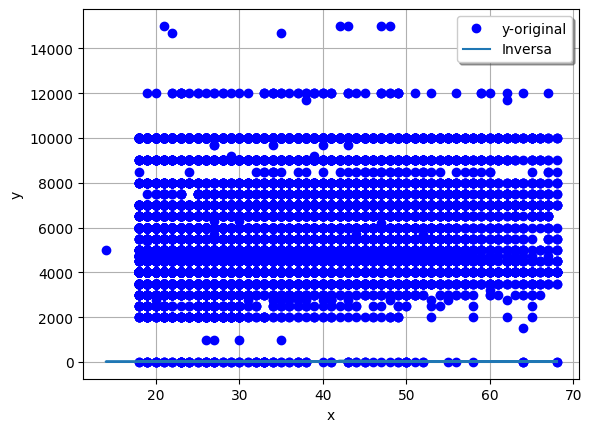

In [204]:
plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, yfit1, label="Inversa")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

In [205]:
R2_3 = r2_score(y, yfit2)
R2_3

-7.586750586851412

In [206]:
corr3= np.sqrt(abs(R2_3))
corr3

2.754405668533851

**Tablas3**

In [208]:
modelos = ["Modelo 1", "Modelo 2", "Modelo 3", "Modelo 4"]
coeficientes = [-2.12, -1.036, -17114515210, -7.58]
data = {'Modelo': modelos, 'Coeficiente de Determinación': coeficientes}
tabla = pd.DataFrame(data)
tabla

Modelo  Coeficiente de Determinación
0  Modelo 1                 -2.120000e+00
1  Modelo 2                 -1.036000e+00
2  Modelo 3                 -1.711452e+10
3  Modelo 4                 -7.580000e+00